In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# t1

In [2]:
ex1 = pd.read_csv('DS_ex1.csv')

In [4]:
len(ex1)

70000

# t2

In [5]:
ex21 = pd.read_csv('DS_ex2_04.18.csv', 
                   parse_dates = ['DATE_OF_BIRTH'], 
                   header = None, 
                   quoting=3, 
                   names = ['SUBS_ID', 'STATUS', 'DATE_OF_BIRTH', 'GNDR_ID', 'COUNT(PT.PAY_ID)', 'PAYMENT', 'CHARGE', 'UNKNOWN1', 'UNKNOWN2'], 
                   skiprows = [0])

In [6]:
ex21.head()

,SUBS_ID,STATUS,DATE_OF_BIRTH,GNDR_ID,COUNT(PT.PAY_ID),PAYMENT,CHARGE,UNKNOWN1,UNKNOWN2
0,593,"""Активен""",2017-09-30,1.0,65700,824394402.0,12746649.0,27.0,NaN
1,161292,"""Активен""",NaT,1.0,380,22800000.0,103856.0,296.0,NaN
2,161306,"""Активен""",NaT,1.0,380,22800000.0,103856.0,296.0,NaN
3,13340,"""Активен""",1983-11-04,NaN,3640,1059972.0,7008.0,1358069.0,979.0
4,249,"""Активен""",2017-09-30,1.0,65700,824394402.0,12746649.0,27.0,NaN


In [7]:
len(ex21.STATUS.unique())

4

In [8]:
ex21.STATUS.unique()

array(['"Активен"', '"Блокирован"', '"Закрыт"', '"Приостановлен"'],
      dtype=object)

In [9]:
len(ex21)

99107

In [10]:
ex22 = pd.read_csv('DS_ex2_callcenter_04.18.csv')

In [11]:
ex22.head()

,SUBS_ID,CNT_contacts
0,964,0
1,851,0
2,150963,0
3,157273,0
4,119856,0


In [12]:
len(ex22)

99107

In [13]:
ex23 = pd.read_csv('DS_ex2_os_04.18.csv')
ex23.head()

,SUBS_ID,OS
0,23463,android
1,23463,web
2,17732,android
3,26667,web
4,23468,android


In [14]:
len(ex23)

102456

In [15]:
ex23 = pd.concat([ex23, pd.get_dummies(ex23.OS)], axis = 1)[['SUBS_ID', 'android', 'ios', 'web']].groupby(by = ['SUBS_ID']).sum().reset_index(drop = False)
ex23.head()

,SUBS_ID,android,ios,web
0,3,0,0,0
1,35,0,0,0
2,58,1,0,0
3,59,0,1,0
4,62,0,0,0


In [16]:
len(ex23)

99107

In [17]:
ex21 = ex21.merge(ex22, how = 'left', on = ['SUBS_ID'])
ex21 = ex21.merge(ex23, how = 'left', on = ['SUBS_ID'])
ex21.head()

,SUBS_ID,STATUS,DATE_OF_BIRTH,GNDR_ID,COUNT(PT.PAY_ID),PAYMENT,CHARGE,UNKNOWN1,UNKNOWN2,CNT_contacts,android,ios,web
0,593,"""Активен""",2017-09-30,1.0,65700,824394402.0,12746649.0,27.0,NaN,0,0,0,0
1,161292,"""Активен""",NaT,1.0,380,22800000.0,103856.0,296.0,NaN,0,0,0,0
2,161306,"""Активен""",NaT,1.0,380,22800000.0,103856.0,296.0,NaN,0,1,0,0
3,13340,"""Активен""",1983-11-04,NaN,3640,1059972.0,7008.0,1358069.0,979.0,0,1,0,1
4,249,"""Активен""",2017-09-30,1.0,65700,824394402.0,12746649.0,27.0,NaN,0,0,0,0


In [18]:
ex21['oses'] = ex21[['android', 'ios', 'web']].sum(axis = 1)
ex21.head()

,SUBS_ID,STATUS,DATE_OF_BIRTH,GNDR_ID,COUNT(PT.PAY_ID),PAYMENT,CHARGE,UNKNOWN1,UNKNOWN2,CNT_contacts,android,ios,web,oses
0,593,"""Активен""",2017-09-30,1.0,65700,824394402.0,12746649.0,27.0,NaN,0,0,0,0,0
1,161292,"""Активен""",NaT,1.0,380,22800000.0,103856.0,296.0,NaN,0,0,0,0,0
2,161306,"""Активен""",NaT,1.0,380,22800000.0,103856.0,296.0,NaN,0,1,0,0,1
3,13340,"""Активен""",1983-11-04,NaN,3640,1059972.0,7008.0,1358069.0,979.0,0,1,0,1,2
4,249,"""Активен""",2017-09-30,1.0,65700,824394402.0,12746649.0,27.0,NaN,0,0,0,0,0


In [19]:
ex21['year'] = ex21.DATE_OF_BIRTH.dt.year
ex21['month'] = ex21.DATE_OF_BIRTH.dt.month
ex21['day'] = ex21.DATE_OF_BIRTH.dt.day
ex21['woy'] = ex21.DATE_OF_BIRTH.dt.week
ex21['dow'] = ex21.DATE_OF_BIRTH.dt.weekday

In [20]:
for col in ex21.columns:
    if not col == 'STATUS' and not col == 'DATE_OF_BIRTH':
        print('{}: nan rate {:.4f}, min {:.4f}, max {:.4f}, mean {:.4f}, mode {:.4f}'.format(col, len(ex21[ex21[col].isnull()]) / len(ex21),
                                                                                             ex21[col].min(), 
                                                                                             ex21[col].max(), 
                                                                                             ex21[col].mean(), 
                                                                                             ex21[col].mode()[0]))

SUBS_ID: nan rate 0.0000, min 3.0000, max 173197.0000, mean 63310.1466, mode 3.0000
GNDR_ID: nan rate 0.1849, min 0.0000, max 1.0000, mean 0.3256, mode 0.0000
COUNT(PT.PAY_ID): nan rate 0.0000, min 0.0000, max 65700.0000, mean 146.1483, mode 1.0000
PAYMENT: nan rate 0.0909, min 0.0000, max 19914004270.0000, mean 2170419.3256, mode 100.0000
CHARGE: nan rate 0.5435, min 1.0000, max 12746649.0000, mean 62032.6742, mode 498.0000
UNKNOWN1: nan rate 0.6696, min 1.0000, max 2064063.0000, mean 8585.4121, mode 9999.0000
UNKNOWN2: nan rate 0.9896, min 1.0000, max 9999.0000, mean 5839.2251, mode 1.0000
CNT_contacts: nan rate 0.0000, min 0.0000, max 20.0000, mean 0.0316, mode 0.0000
android: nan rate 0.0000, min 0.0000, max 1.0000, mean 0.1996, mode 0.0000
ios: nan rate 0.0000, min 0.0000, max 1.0000, mean 0.0653, mode 0.0000
web: nan rate 0.0000, min 0.0000, max 1.0000, mean 0.0352, mode 0.0000
oses: nan rate 0.0000, min 0.0000, max 3.0000, mean 0.3000, mode 0.0000
year: nan rate 0.0006, min 1968

In [21]:
len(ex21[(ex21.year == 1970) & (ex21.month == 1) & (ex21.day == 1)])

0

In [22]:
len(ex21)

99107

In [23]:
len(ex21.SUBS_ID.unique())

99107

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [25]:
sns.set()
sns.set_style('white', {'axes.grid': False, 'axes.edgecolor': '0.9'})

Text(0.5,1,'classes representation')

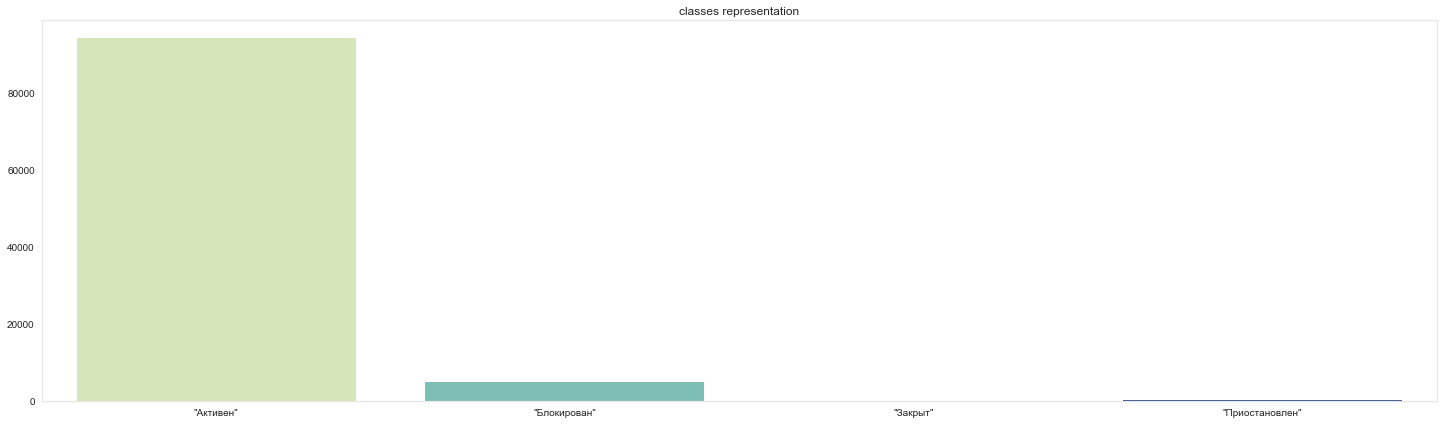

In [26]:
f, ax = plt.subplots(figsize=(25, 7))
sns.barplot(x = ['"Активен"', '"Блокирован"', '"Закрыт"', '"Приостановлен"'], y = [len(ex21[ex21.STATUS == '"Активен"']), 
                                                                                   len(ex21[ex21.STATUS == '"Блокирован"']), 
                                                                                   len(ex21[ex21.STATUS == '"Закрыт"']), 
                                                                                   len(ex21[ex21.STATUS == '"Приостановлен"'])],  
            ax = ax, 
            palette = sns.color_palette("YlGnBu", n_colors=4))
ax.set_title('classes representation')

In [27]:
len(ex21[ex21.STATUS == '"Закрыт"'])

43

In [28]:
encoder = LabelEncoder()
ex21['status_encoded'] = encoder.fit_transform(ex21.STATUS)

In [29]:
columns = list(ex21.columns)
for col in ['STATUS', 'DATE_OF_BIRTH']:
    columns.remove(col)

In [30]:
ex21[columns] = ex21[columns].fillna(-1)

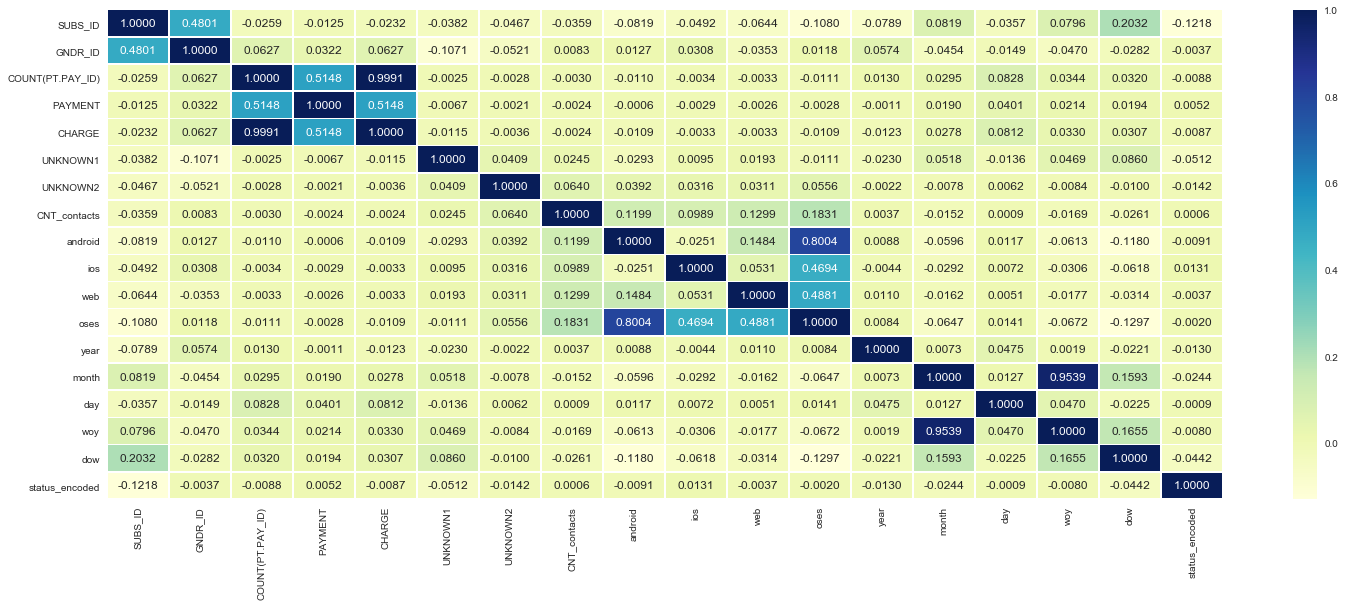

In [31]:
f, ax = plt.subplots(figsize=(25, 9))
# sns.pairplot(ex21[columns], hue="status_encoded", palette = sns.color_palette("YlGnBu", n_colors=4))
sns.heatmap(ex21[columns].corr(), annot=True, fmt=".4f", ax = ax, linewidths=.5, cmap = "YlGnBu")

In [32]:
len(columns)

18

In [33]:
palette = sns.color_palette("YlGnBu", n_colors=4)
palette[0]

(0.84, 0.9372549019607843, 0.7011764705882353)

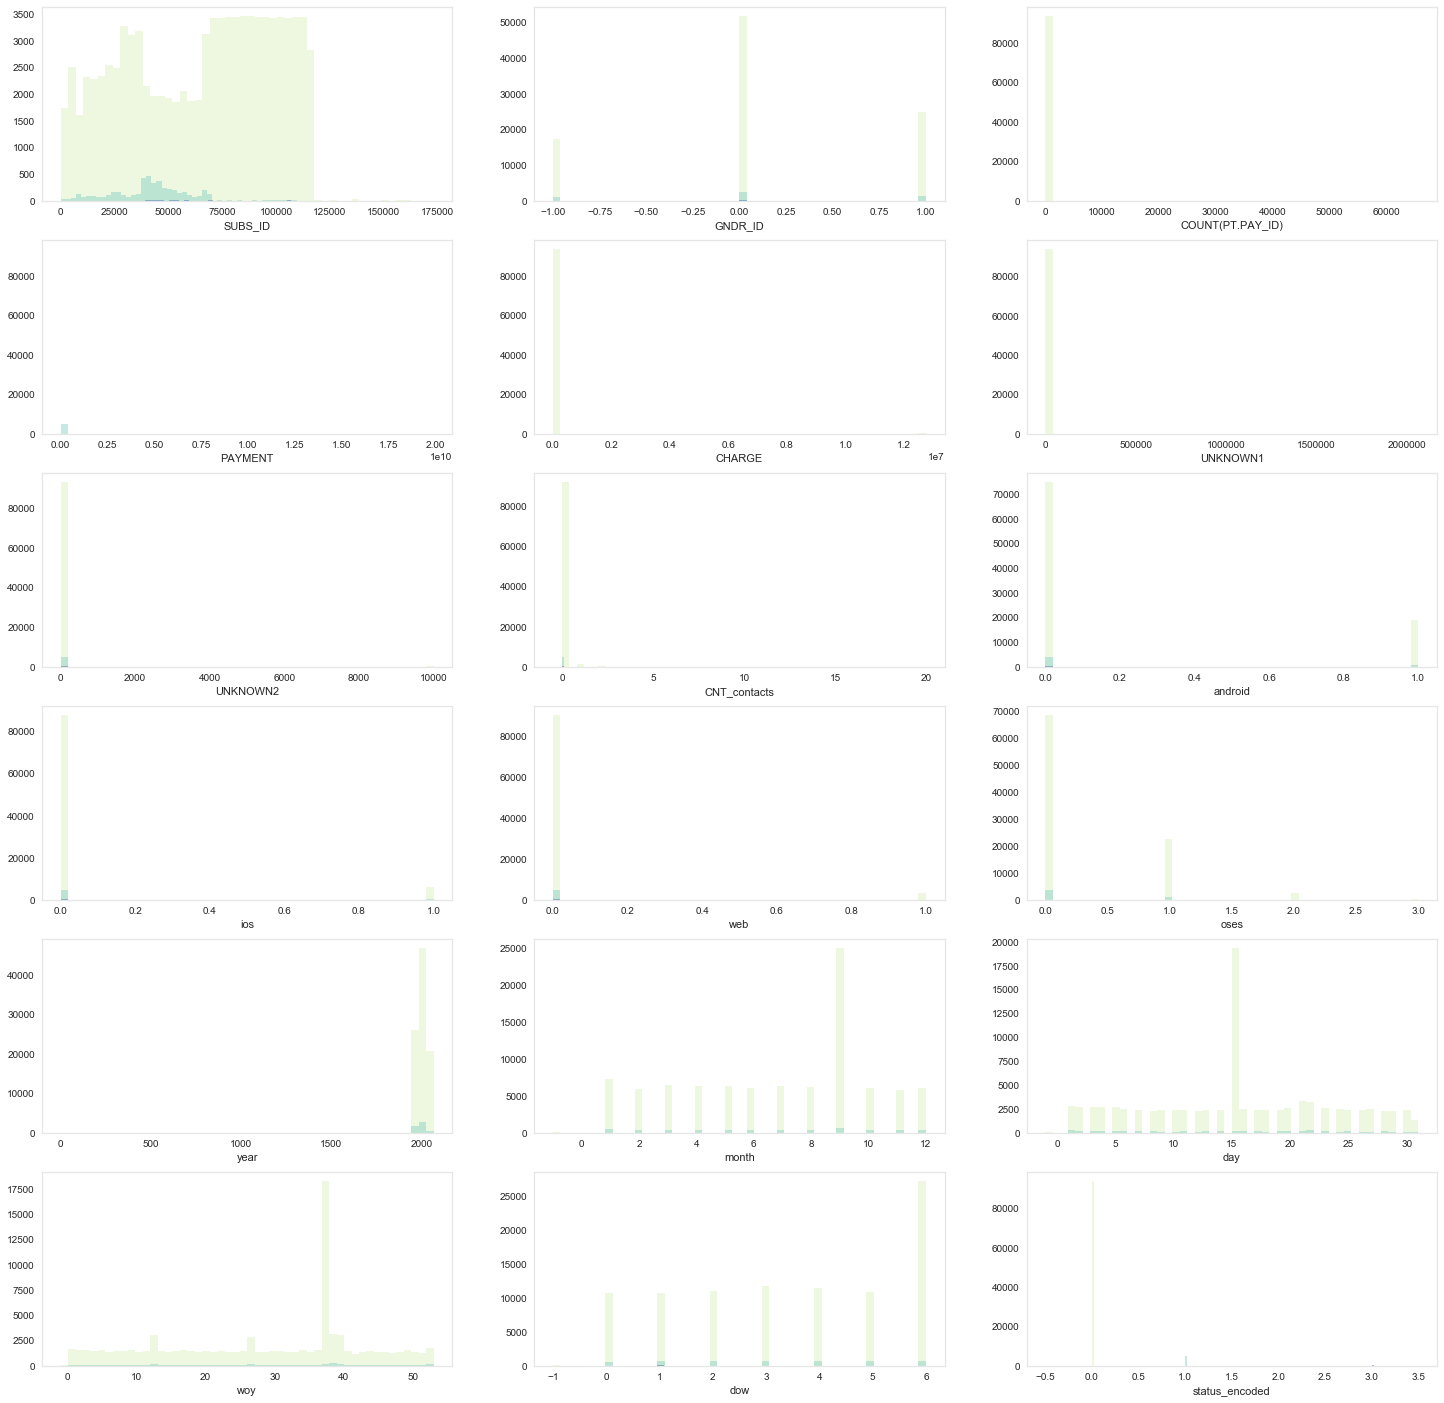

In [34]:
f, ax = plt.subplots(6, 3, figsize=(25, 25))
# sns.pairplot(ex21[columns], hue="status_encoded", palette = sns.color_palette("YlGnBu", n_colors=4))
columns = np.array(columns).reshape(6, 3)
for i in np.arange(0, columns.shape[0], 1):
    for j in np.arange(0, columns.shape[1], 1):
        sns.distplot(ex21[ex21.status_encoded == 0][columns[i, j]],  ax = ax[i, j], color = palette[0], kde = False, bins = 50)
        sns.distplot(ex21[ex21.status_encoded == 1][columns[i, j]],  ax = ax[i, j], color = palette[1], kde = False, bins = 50)
        sns.distplot(ex21[ex21.status_encoded == 2][columns[i, j]],  ax = ax[i, j], color = palette[2], kde = False, bins = 50)
        sns.distplot(ex21[ex21.status_encoded == 3][columns[i, j]],  ax = ax[i, j], color = palette[3], kde = False, bins = 50)

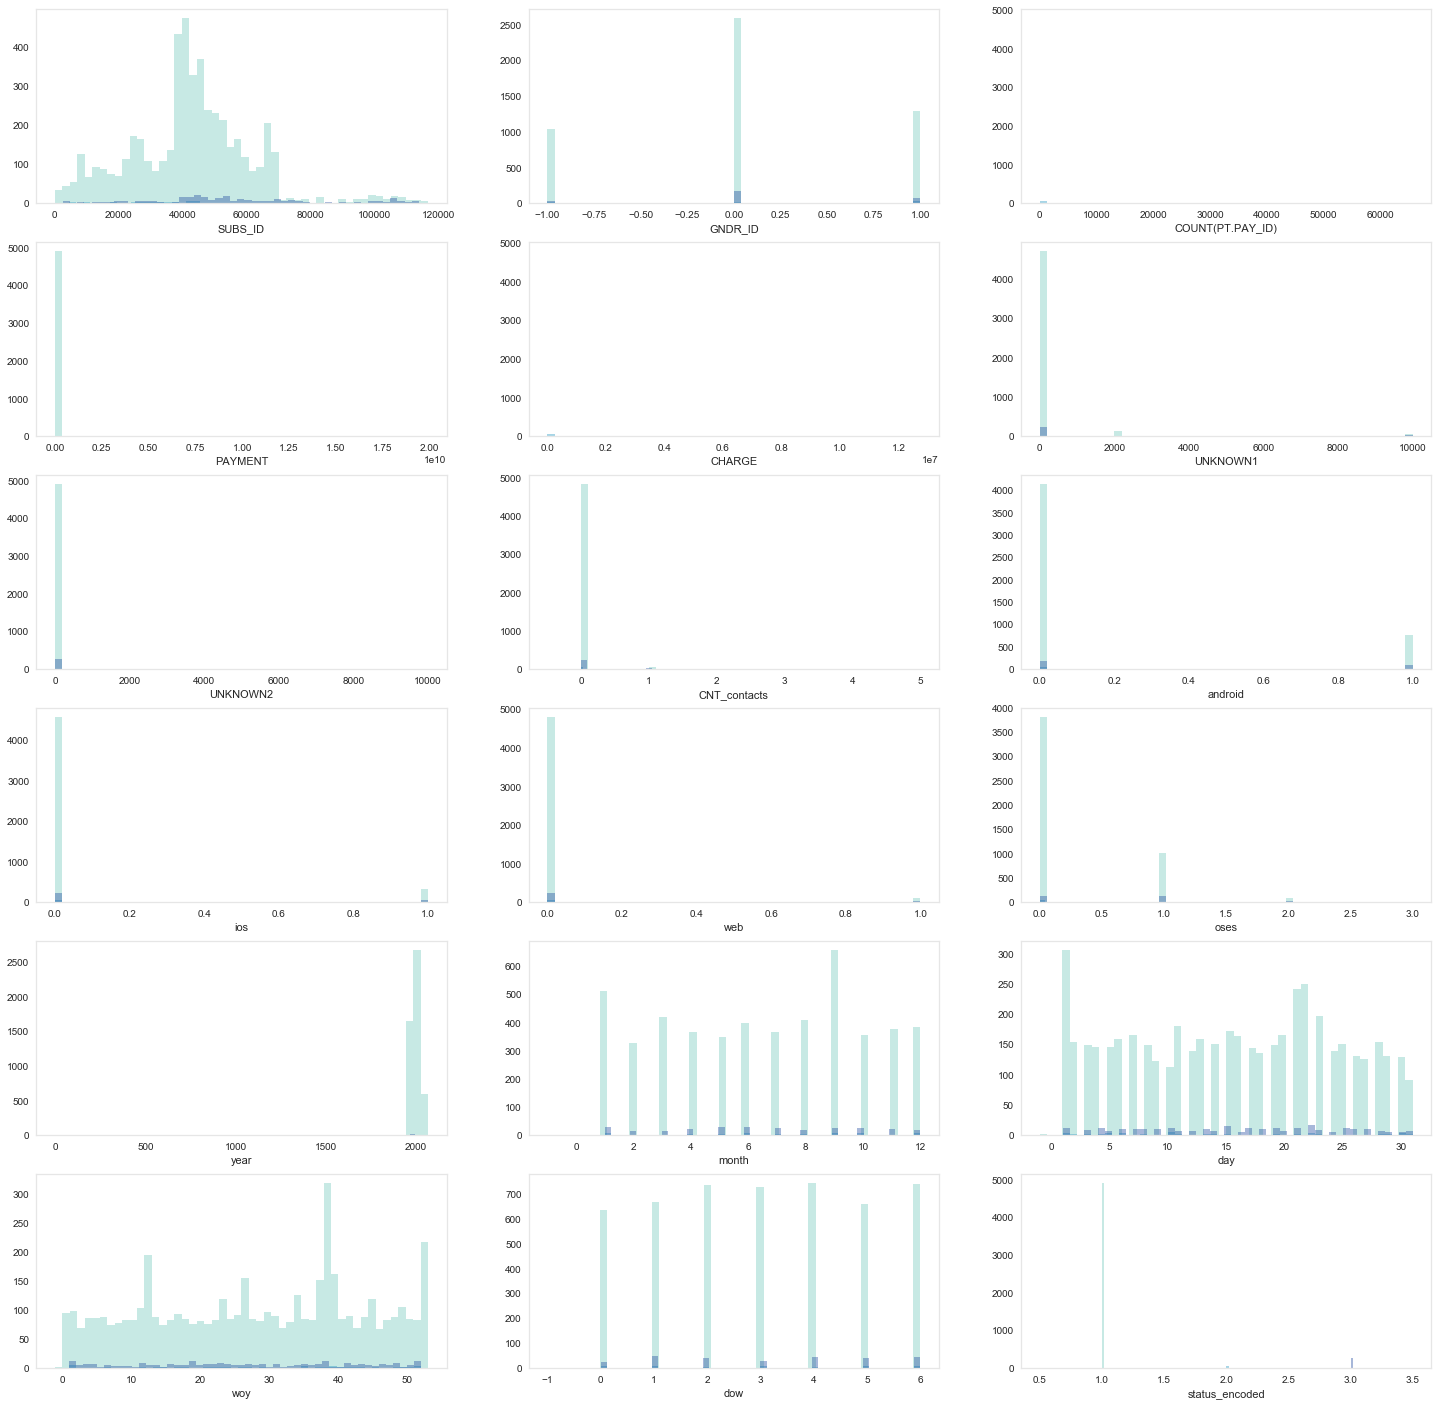

In [35]:
f, ax = plt.subplots(6, 3, figsize=(25, 25))
# sns.pairplot(ex21[columns], hue="status_encoded", palette = sns.color_palette("YlGnBu", n_colors=4))
columns = np.array(columns).reshape(6, 3)
for i in np.arange(0, columns.shape[0], 1):
    for j in np.arange(0, columns.shape[1], 1):
#         sns.distplot(ex21[ex21.status_encoded == 0][columns[i, j]],  ax = ax[i, j], color = palette[0], kde = False)
        sns.distplot(ex21[ex21.status_encoded == 1][columns[i, j]],  ax = ax[i, j], color = palette[1], kde = False, bins = 50)
        sns.distplot(ex21[ex21.status_encoded == 2][columns[i, j]],  ax = ax[i, j], color = palette[2], kde = False, bins = 50)
        sns.distplot(ex21[ex21.status_encoded == 3][columns[i, j]],  ax = ax[i, j], color = palette[3], kde = False, bins = 50)

# PCA

In [36]:
from sklearn.decomposition import PCA

In [37]:
columns = list(columns.flatten())
columns.remove('SUBS_ID')
len(columns)

17

In [38]:
columns.remove('status_encoded')

In [39]:
pca = PCA(n_components = 2)
components = pca.fit_transform(ex21[columns].values)

In [40]:
pca.explained_variance_ratio_

array([9.99953308e-01, 4.66692243e-05])

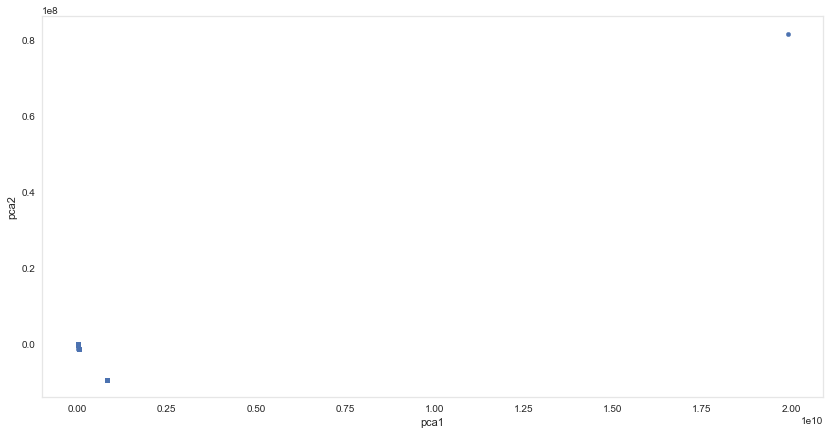

In [41]:
f, ax = plt.subplots(figsize=(14, 7))
# sns.pairplot(ex21[columns], hue="status_encoded", palette = sns.color_palette("YlGnBu", n_colors=4))
components = pd.DataFrame(components, columns = ['pca1', 'pca2'])
components.plot.scatter(x = 'pca1', y = 'pca2', ax = ax)

In [42]:
ex21['pca1'] = pca.transform(ex21[columns].values)[:, 0]

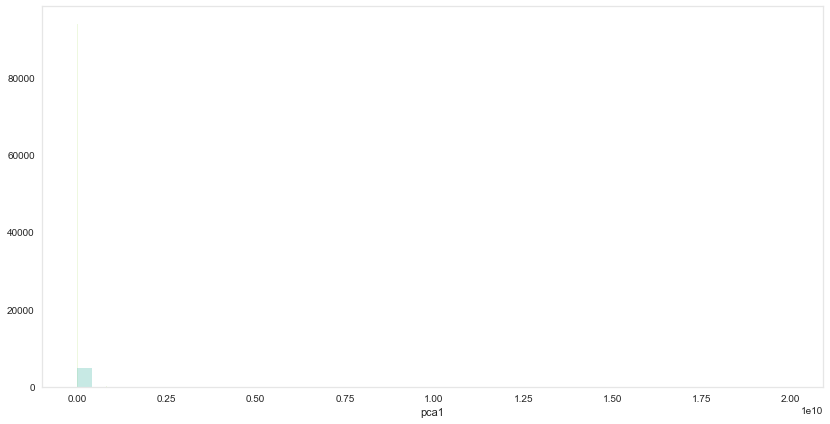

In [43]:
f, ax = plt.subplots(figsize=(14, 7))
sns.distplot(ex21[ex21.status_encoded == 0]['pca1'],  ax = ax, color = palette[0], kde = False, bins = 50)
sns.distplot(ex21[ex21.status_encoded == 1]['pca1'],  ax = ax, color = palette[1], kde = False, bins = 50)
sns.distplot(ex21[ex21.status_encoded == 2]['pca1'],  ax = ax, color = palette[2], kde = False, bins = 50)
sns.distplot(ex21[ex21.status_encoded == 3]['pca1'],  ax = ax, color = palette[3], kde = False, bins = 50)